## Data Engineering Individual Project 1: Student Performance Dataset Descriptive Statistics

In this project, I created a GitHub repository to explore continuous integration using GitHub Actions for a descriptive statistics project. To ensure a smooth workflow, I have implemented tests on Python files that cover essential tasks such as installing core packages, code formatting, linting, and testing. Specifically, there are two distinct Python scripts in this project: **`lib.py`** and **`script.py`**.

- **`lib.py`** contains shared functions that support reading data and handling common operations like loading CSV files using Pandas.
  
- **`script.py`** is responsible for performing descriptive statistical analysis on datasets, including functions for calculating the mean, median, and standard deviation of specified columns. For example, functions such as `calc_mean()` and `calc_sd()` calculate the mean and standard deviation of a column from a dataset, handling edge cases such as non-numeric data.

To thoroughly test these files, I have created **`test_lib.py`** and **`test_script.py`**. These test files include unit tests for functions within `lib.py` and `script.py`, ensuring correctness and robustness of the calculations. The `test_script.py` file, for instance, tests whether functions like `calc_mean()` and `calc_sd()` correctly compute the expected statistical values from the dataset and handle various types of input.

The GitHub Actions workflows have been configured to automatically run these tests as part of the continuous integration process. This ensures that the code is always tested for correctness whenever changes are made. So far, the workflows are functioning effectively, and tests for all essential functions have passed successfully.

In [20]:
# load packages
import matplotlib.pyplot as plt
from script import calc_mean, calc_median, calc_sd, draw
import pandas as pd
import math

In [13]:
# lib.py
file = 'student_performance.csv'

def read_data(file):
    df = pd.read_csv(file)
    return df

df = read_data(file)
df.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85


In [15]:
# script.py
def calc_mean(path, colname):
    df = read_data(path)
    if colname not in df.columns:
        return "Column Does Not Exist"
    elif df[colname].dtype == object:
        return "Mean not available for string"
    else:
        return sum(df[colname]) / len(df[colname])


def calc_median(path, colname):
    df = read_data(path)
    if colname not in df.columns:
        return "Column Does Not Exist"
    elif df[colname].dtype == object:
        return "Median not available for string"
    else:
        sorted_data = sorted(df[colname])
        n = len(sorted_data)
        if n % 2 == 1:
            median_val = sorted_data[n // 2]
        else:
            median_val = (sorted_data[n // 2 - 1] + sorted_data[n // 2]) / 2
        return median_val


def calc_sd(path, colname):
    df = read_data(path)
    if colname not in df.columns:
        return "Column Does Not Exist"
    elif df[colname].dtype == object:
        return "Standard Deviation not available for string"
    else:
        variance = sum((x - calc_mean(path, colname)) ** 2 for x in df[colname]) / (
            len(df[colname]) - 1
        )
        std = math.sqrt(variance)
        return std


def draw(path, colname):
    df = read_data(path)
    if colname not in df.columns:
        return "Column Does Not Exist"
    elif df[colname].dtype == object:
        return "Plot not available for string"
    else:
        plt.hist(df[colname], bins=5)
        plt.xlabel(f"{colname}")
        plt.ylabel("Frequency")
        plt.title(f"{colname} Distribution")
        plt.show()

### Mean

In [16]:
for col in df.columns:
    print(f'{col}: {calc_mean(file,col)}')

StudentID: 5.5
Name: Mean not available for string
Gender: Mean not available for string
AttendanceRate: 85.6
StudyHoursPerWeek: 17.7
PreviousGrade: 78.1
ExtracurricularActivities: 1.5
ParentalSupport: Mean not available for string
FinalGrade: 80.2


### Median

In [17]:
for col in df.columns:
    print(f'{col}: {calc_median(file,col)}')

StudentID: 5.5
Name: Median not available for string
Gender: Median not available for string
AttendanceRate: 86.5
StudyHoursPerWeek: 17.5
PreviousGrade: 80.0
ExtracurricularActivities: 1.5
ParentalSupport: Median not available for string
FinalGrade: 82.5


### Standard Deviation

In [18]:
for col in df.columns:
    print(f'{col}: {calc_sd(file,col)}')

StudentID: 3.0276503540974917
Name: Standard Deviation not available for string
Gender: Standard Deviation not available for string
AttendanceRate: 7.441624673267107
StudyHoursPerWeek: 6.848357467305573
PreviousGrade: 10.170217958988555
ExtracurricularActivities: 1.0801234497346435
ParentalSupport: Standard Deviation not available for string
FinalGrade: 10.09730437074943


### Histogram

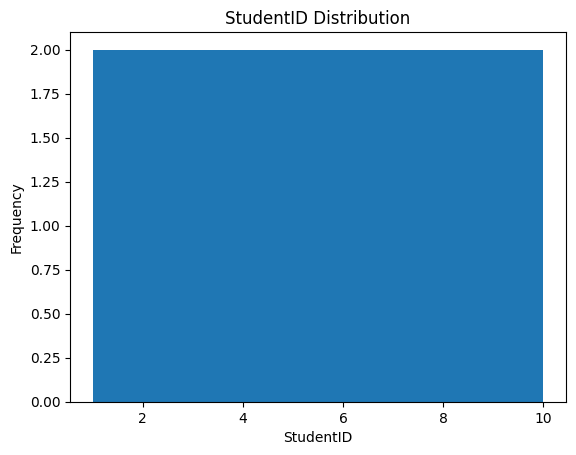

StudentID: None
Name: Plot not available for string
Gender: Plot not available for string


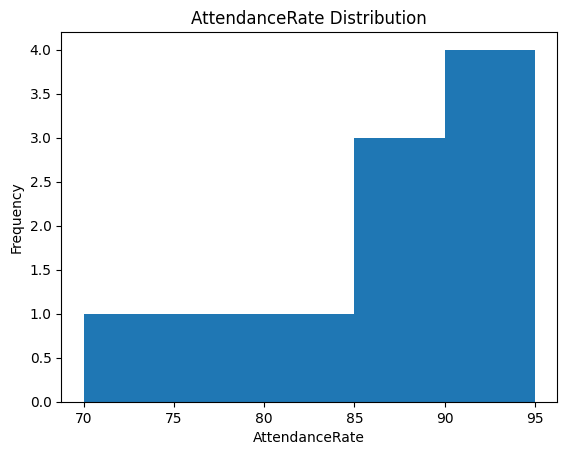

AttendanceRate: None


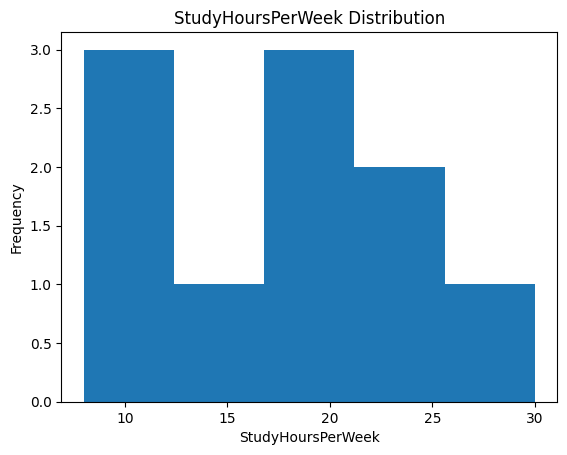

StudyHoursPerWeek: None


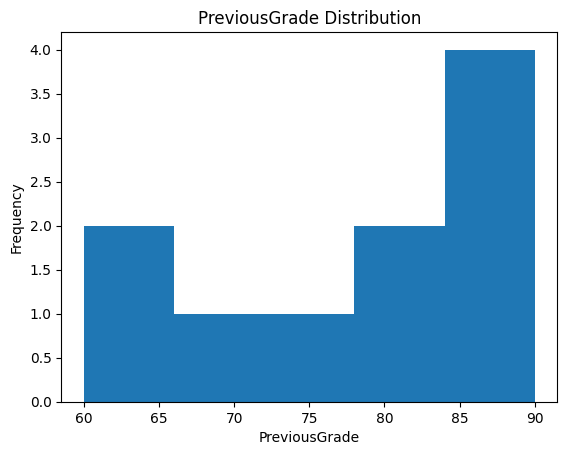

PreviousGrade: None


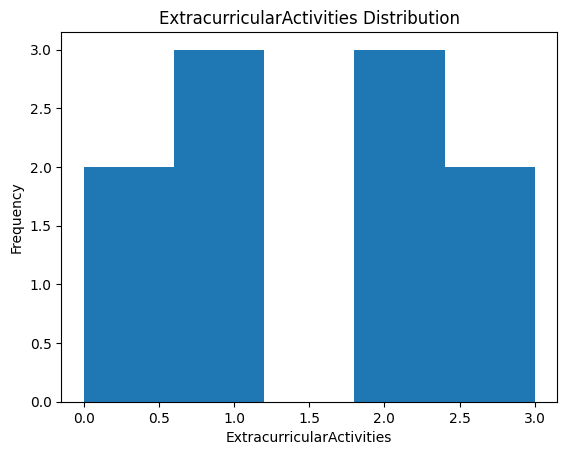

ExtracurricularActivities: None
ParentalSupport: Plot not available for string


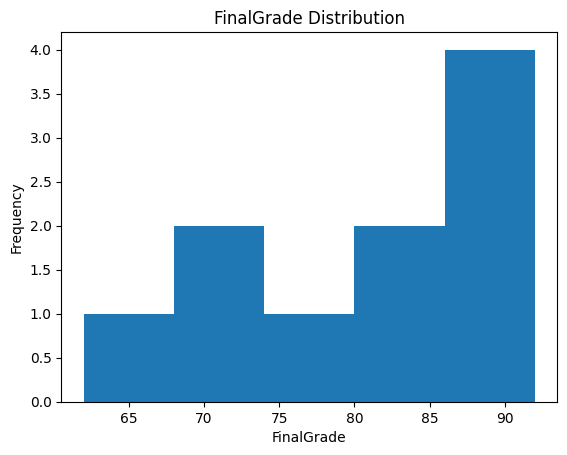

FinalGrade: None


In [19]:
for col in df.columns:
    print(f'{col}: {draw(file,col)}')